# Purouse: To learn about fluids and navier stokes equation fluid mechanics

In [1]:
from phi.flow import *

In [2]:
v = StaggeredGrid(
    values = lambda pos: vec(
        x=math.cos(pos).vector["x"]* math.sin(pos).vector["y"],
        y=math.sin(pos).vector["x"]* math.sin(pos).vector["y"],
        
    ),
    extrapolation=extrapolation.PERIODIC,
    x=25,
    y=25,
    bounds=Box(x=2*PI, y = 2*PI),
)

In [8]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/phi/field/_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/phi/field/_field.py:148: FutureWarning: Instance checks on PointCloud are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, PointCloud)


<Figure size 1200x500 with 1 Axes>

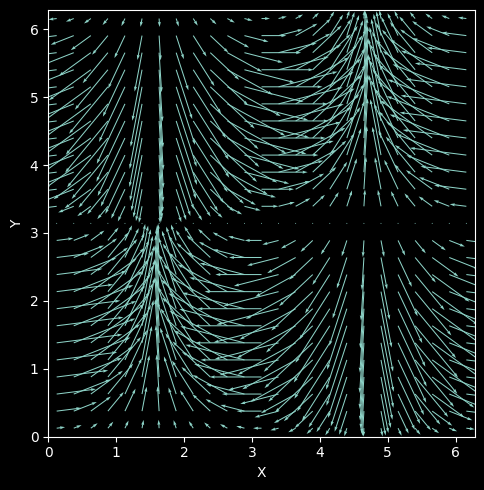

In [9]:
plot(v)

In [14]:
def make_step(v,dt=.5):
    v = advect.semi_lagrangian(v, v, dt=dt)
    v = diffuse.implicit(v, 0.1, dt)
    v, _ = fluid.make_incompressible(v)
    return v

In [10]:
trj = iterate(make_step, batch(time=20), v)

In [15]:
plot(trj, animate="time", size=(5, 5))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/phi/field/_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/phi/field/_field.py:148: FutureWarning: Instance checks on PointCloud are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, PointCloud)
